<a href="https://colab.research.google.com/github/awaaat/Machine_learning-Deep_learning/blob/main/Wine_Quality.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [75]:
import pandas as pd

In [76]:
#We import the data

df = pd.read_csv("/content/WineQT.csv")
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


  #Perform Data Exploration

In [77]:
df.info()
df.isnull().sum()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [78]:
df.describe().T

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [79]:
df.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

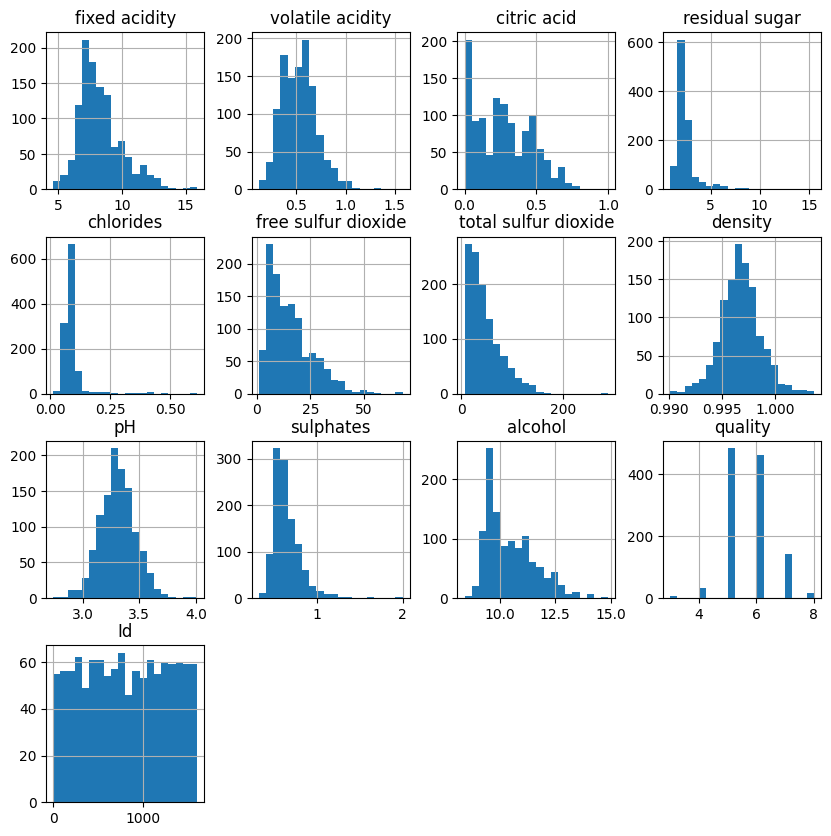

In [80]:
import matplotlib.pyplot as plt
df.hist(bins = 20, figsize = (10, 10))
plt.legend
plt.show()

#Now let’s draw the count plot to visualise the number data for each quality of wine.

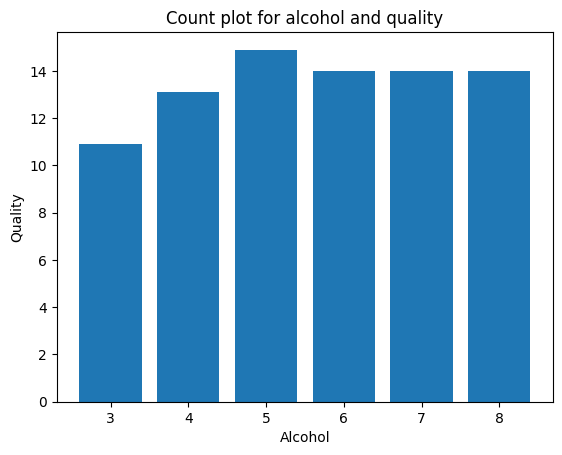

In [81]:
plt.bar(df["quality"], df["alcohol"])
plt.xlabel("Alcohol")
plt.ylabel("Quality")
plt.title("Count plot for alcohol and quality")
plt.legend
plt.show()

#There are times when the data may have redundant features they do not help with increasing the model’s performance that is why we remove them before using them to train our model.

In [82]:
import seaborn as sb

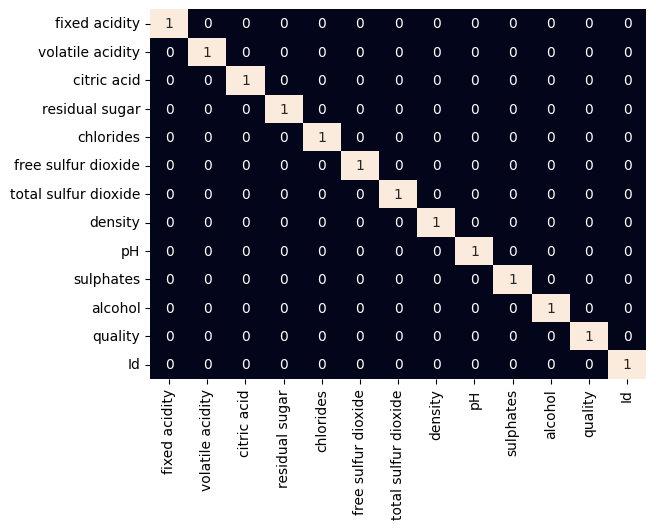

<Figure size 1000x1000 with 0 Axes>

In [83]:
sb.heatmap(df.corr()>0.7, annot = True, cbar=False)
plt.figure(figsize= (10, 10))
plt.legend
plt.show()

#Model Development

In [91]:
#First of all, how do we know our wine is of best quality?
#it is of best quality if quality = 1
df["quality"].nunique()
#df1 = df.copy()
#We come up with a column that has 1 for best quality, and 0 for otherwise. The quality of 5 + will fall into th  1 category

6

In [100]:
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [103]:
D_f1 = df.copy()
df_2 = D_f1.copy()

In [125]:
df_2["Quality Classfified"]  = [1 if i > 5 else 0 for i in D_f1.quality]
df_2.head()
df  = df_2.copy()
df = df.drop(columns= ["quality class", "Id"])
df = df.drop(columns = ["Quality Classfified"])
df["Quality Class"].nunique()
df.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Quality Class
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,0
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,0
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,1
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0


#Let us have our Features and target, to get training and testing datasets

In [131]:
features = df.drop(columns = ["quality", "Quality Class"])
target = df["Quality Class"]
X = features
y = target

In [140]:
import sklearn
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size = 0.8, test_size = 0.2, random_state = 40)
print(f"X train: {X_train.shape}")
print(f"y train: {y_train.shape}")
print(f"X test: {X_test.shape}")
print(f"y test: {y_test.shape}")

X train: (914, 11)
y train: (914,)
X test: (229, 11)
y test: (229,)


#Let us do some feature Engineering

In [145]:
from sklearn.preprocessing import MinMaxScaler
scaler = MinMaxScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)
X_train[:5]

array([[0.4       , 0.16438356, 0.52      , 0.08275862, 0.16527546,
        0.05970149, 0.01470588, 0.41189427, 0.4488189 , 0.17365269,
        0.51785714],
       [0.36363636, 0.23972603, 0.27      , 0.09655172, 0.07178631,
        0.19402985, 0.08088235, 0.37371512, 0.34645669, 0.28143713,
        0.5       ],
       [0.28181818, 0.30821918, 0.21      , 0.04137931, 0.0951586 ,
        0.04477612, 0.01102941, 0.33113069, 0.33070866, 0.1257485 ,
        0.25      ],
       [0.20909091, 0.31506849, 0.2       , 0.05862069, 0.07679466,
        0.10447761, 0.05882353, 0.23127753, 0.50393701, 0.09580838,
        0.58928571],
       [0.49090909, 0.17808219, 0.38      , 0.04827586, 0.26210351,
        0.3880597 , 0.30882353, 0.66593245, 0.32283465, 0.19161677,
        0.01785714]])

# We now pick a model and do the modelling

In [149]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from xgboost import XGBClassifier
from sklearn import metrics

In [148]:
model = [LogisticRegression(),XGBClassifier(), SVC(kernel='rbf')]


In [152]:
for epoch in range(3):
  model[epoch].fit(X_train, y_train)
  print(f"Epoch: {model[epoch]}")
  print(f"Training Accuracy: {metrics.roc_auc_score(y_train, model[epoch].predict(X_train))}")
  print(f"Validation Accuracy: {metrics.roc_auc_score(y_test, model[epoch].predict(X_test))}")
  print()

Epoch: LogisticRegression()
Training Accuracy: 0.7593456032719836
Validation Accuracy: 0.7485551390190567

Epoch: XGBClassifier(base_score=None, booster=None, callbacks=None,
              colsample_bylevel=None, colsample_bynode=None,
              colsample_bytree=None, device=None, early_stopping_rounds=None,
              enable_categorical=False, eval_metric=None, feature_types=None,
              gamma=None, grow_policy=None, importance_type=None,
              interaction_constraints=None, learning_rate=None, max_bin=None,
              max_cat_threshold=None, max_cat_to_onehot=None,
              max_delta_step=None, max_depth=None, max_leaves=None,
              min_child_weight=None, missing=nan, monotone_constraints=None,
              multi_strategy=None, n_estimators=None, n_jobs=None,
              num_parallel_tree=None, random_state=None, ...)
Training Accuracy: 1.0
Validation Accuracy: 0.7678069353327084

Epoch: SVC()
Training Accuracy: 0.7773439191627571
Validation Ac

#Model Evaluation

In [165]:
import matplotlib.pyplot as plt
con_matrix = metrics.confusion_matrix(y_test, model[epoch].predict(X_test))

In [173]:
print(metrics.classification_report(y_test, model[1].predict(X_test)))


              precision    recall  f1-score   support

           0       0.71      0.76      0.74        97
           1       0.82      0.77      0.79       132

    accuracy                           0.77       229
   macro avg       0.76      0.77      0.77       229
weighted avg       0.77      0.77      0.77       229

